<a href="https://colab.research.google.com/github/YaniManetti/ProyectoDS_ParteI_Manetti/blob/main/ProyectoDS_ParteIII_Manetti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bienvenidos!**
En este Proyecto vamos a analizar la **deserción de clientes de un Banco**.
Todos los bancos quieren mantener a sus clientes para mantener su negocio

**OBJETIVO:**

El objetivo principal consiste en aprovechar este conjunto de datos para construir un modelo predictivo capaz de anticipar con precisión la probabilidad de que un cliente abandone el banco, basándose en sus características individuales. Esto permitiría diseñar estrategias específicas orientadas a retener a clientes con mayor riesgo de rotación.

**PREGUNTAS E HIPÓTESIS:**

**1- ¿Qué características demográficas (edad, género, ubicación) están asociadas con una mayor probabilidad de abandono?**

Hipótesis:

- Los clientes más jóvenes tienen una mayor probabilidad de abandono debido a su menor fidelidad hacia las instituciones financieras.
- No existen diferencias significativas en la tasa de abandono entre géneros.
- Los clientes que residen en España presentan una mayor tasa de abandono en comparación con los de Francia y Alemania, posiblemente debido a diferencias en la competencia bancaria o características socioeconómicas propias del país

**2 - ¿Cómo influye el salario o el saldo promedio de la cuenta en la decisión de abandonar el banco?**

Hipótesis:

- Los clientes con salarios más bajos tienen mayor probabilidad de abandono, ya que pueden percibir mayores dificultades para mantener productos financieros
- Los clientes con saldos promedio bajos tienen mayor riesgo de rotación, ya que podrían estar menos comprometidos con el banco.
- Los clientes con saldos altos tienen menor probabilidad de abandono, ya que suelen tener una relación más estable con el banco.

**3 - ¿Los clientes con productos financieros como tarjetas de crédito, tienen menor riesgo de abandono?**

Hipótesis:

- Los clientes que poseen tarjetas de crédito tienen menor probabilidad de abandono, ya que estos productos generan una relación más activa con el banco.

**4 - ¿Hay diferencias significativas en la rotación según el tiempo que el cliente lleva con el banco?**

Hipótesis:

- Los clientes con menor antigüedad tienen mayor probabilidad de abandono, ya que aún no han desarrollado una relación sólida con el banco.
- Los clientes con mayor antigüedad tienen menor riesgo de rotación debido a su fidelidad y confianza acumulada en la institución.
- La tasa de abandono disminuye progresivamente con el tiempo que el cliente lleva en el banco.

**5 - ¿Cómo influye la puntuación de crédito en la probabilidad de que un cliente abandone el banco?**

Hipótesis:

- Los clientes con puntuaciones de crédito más bajas tienen una mayor probabilidad de abandonar el banco, ya que podrían enfrentar mayores dificultades financieras o recibir menos beneficios de la entidad bancaria.


*Dato a tener en cuenta:*

*   TieneTarjeta: (1 para Sí, 0 para No)
*   EsMiembroActivo: (1 para Sí, 0 para No)
*   Destino: Si el cliente salió del banco (1 para Sí, 0 para No)

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/YaniManetti/ProyectoDS_ParteI_Manetti/main/Desercion_Clientes_Banco.csv'
df = pd.read_csv(url, encoding='latin1')

df.head()

,ID,ID_Cliente,Apellido,Puntuacion_Credito,Pais,Genero,Edad,Tenencia,Saldo,NumProductos,TieneTarjeta,EsMiembroActivo,SalarioEstimado,Destino
0,1,15634602,Hargrave,619,Francia,Femenino,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,España,Femenino,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Francia,Femenino,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Francia,Femenino,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,España,Femenino,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print(df)

         ID  ID_Cliente   Apellido  Puntuacion_Credito      Pais     Genero  \
0         1    15634602   Hargrave                 619   Francia   Femenino   
1         2    15647311       Hill                 608    España   Femenino   
2         3    15619304       Onio                 502   Francia   Femenino   
3         4    15701354       Boni                 699   Francia   Femenino   
4         5    15737888   Mitchell                 850    España   Femenino   
...     ...         ...        ...                 ...       ...        ...   
9995   9996    15606229   Obijiaku                 771   Francia  Masculino   
9996   9997    15569892  Johnstone                 516   Francia  Masculino   
9997   9998    15584532        Liu                 709   Francia   Femenino   
9998   9999    15682355  Sabbatini                 772  Alemania  Masculino   
9999  10000    15628319     Walker                 792   Francia   Femenino   

      Edad  Tenencia      Saldo  NumProductos  Tien

*Vemos las dimensiones del Dataframe*

In [4]:
print(df.shape)

(10000, 14)


*Verificamos la informacion y si tiene datos nulos*

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  10000 non-null  int64  
 1   ID_Cliente          10000 non-null  int64  
 2   Apellido            10000 non-null  object 
 3   Puntuacion_Credito  10000 non-null  int64  
 4   Pais                10000 non-null  object 
 5   Genero              10000 non-null  object 
 6   Edad                10000 non-null  int64  
 7   Tenencia            10000 non-null  int64  
 8   Saldo               10000 non-null  float64
 9   NumProductos        10000 non-null  int64  
 10  TieneTarjeta        10000 non-null  int64  
 11  EsMiembroActivo     10000 non-null  int64  
 12  SalarioEstimado     10000 non-null  float64
 13  Destino             10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


*Verificamos que no tiene datos nulos*

In [6]:
print(df.isnull().sum())

ID                    0
ID_Cliente            0
Apellido              0
Puntuacion_Credito    0
Pais                  0
Genero                0
Edad                  0
Tenencia              0
Saldo                 0
NumProductos          0
TieneTarjeta          0
EsMiembroActivo       0
SalarioEstimado       0
Destino               0
dtype: int64


*Vemos la descripcion de los valores numericos*

In [7]:
print(df.describe())

                ID    ID_Cliente  Puntuacion_Credito          Edad  \
count  10000.00000  1.000000e+04        10000.000000  10000.000000   
mean    5000.50000  1.569094e+07          650.528800     38.921800   
std     2886.89568  7.193619e+04           96.653299     10.487806   
min        1.00000  1.556570e+07          350.000000     18.000000   
25%     2500.75000  1.562853e+07          584.000000     32.000000   
50%     5000.50000  1.569074e+07          652.000000     37.000000   
75%     7500.25000  1.575323e+07          718.000000     44.000000   
max    10000.00000  1.581569e+07          850.000000     92.000000   

           Tenencia          Saldo  NumProductos  TieneTarjeta  \
count  10000.000000   10000.000000  10000.000000   10000.00000   
mean       5.012800   76485.889288      1.530200       0.70550   
std        2.892174   62397.405202      0.581654       0.45584   
min        0.000000       0.000000      1.000000       0.00000   
25%        3.000000       0.000000     

*Veamos los clientes que tienen el puntaje de credito menor que la media*

In [8]:
print(df[df['Puntuacion_Credito'] < 652])

        ID  ID_Cliente        Apellido  Puntuacion_Credito      Pais  \
0        1    15634602        Hargrave                 619   Francia   
1        2    15647311            Hill                 608    España   
2        3    15619304            Onio                 502   Francia   
5        6    15574012             Chu                 645    España   
7        8    15656148          Obinna                 376  Alemania   
...    ...         ...             ...                 ...       ...   
9984  9985    15696175  Echezonachukwu                 602  Alemania   
9987  9988    15588839         Mancini                 606    España   
9991  9992    15769959     Ajuluchukwu                 597   Francia   
9993  9994    15569266          Rahman                 644   Francia   
9996  9997    15569892       Johnstone                 516   Francia   

         Genero  Edad  Tenencia      Saldo  NumProductos  TieneTarjeta  \
0      Femenino    42         2       0.00             1     

In [9]:
print(df[df['Puntuacion_Credito'] < 652].describe())

                ID    ID_Cliente  Puntuacion_Credito         Edad  \
count  4987.000000  4.987000e+03         4987.000000  4987.000000   
mean   5007.285743  1.569080e+07          571.952677    38.973732   
std    2871.843459  7.182532e+04           58.047847    10.377526   
min       1.000000  1.556571e+07          350.000000    18.000000   
25%    2542.500000  1.562815e+07          534.000000    32.000000   
50%    5022.000000  1.569068e+07          584.000000    37.000000   
75%    7471.000000  1.575323e+07          619.000000    44.000000   
max    9997.000000  1.581569e+07          651.000000    88.000000   

          Tenencia          Saldo  NumProductos  TieneTarjeta  \
count  4987.000000    4987.000000   4987.000000   4987.000000   
mean      5.021456   76064.304542      1.529577      0.710046   
std       2.883509   62359.386597      0.586721      0.453786   
min       0.000000       0.000000      1.000000      0.000000   
25%       3.000000       0.000000      1.000000      

Vamos a concentrarnos en la primer pregunta y su hipotesis para realizar los primeros graficos

**1- ¿Qué características demográficas (edad, género, ubicación) están asociadas con una mayor probabilidad de abandono?**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

HIPOTESIS 1: Los clientes más jóvenes tienen una mayor probabilidad de abandono debido a su menor fidelidad hacia las instituciones financieras.

*Elegimos Boxplot porque muestra la distribución completa de edades para cada grupo (clientes que se fueron vs. los que se quedaron), incluyendo mediana y posibles outliers.*

*Ayuda a detectar si los clientes que abandonan tienden a tener una edad menor, lo cual respaldaría mi hipótesis.*

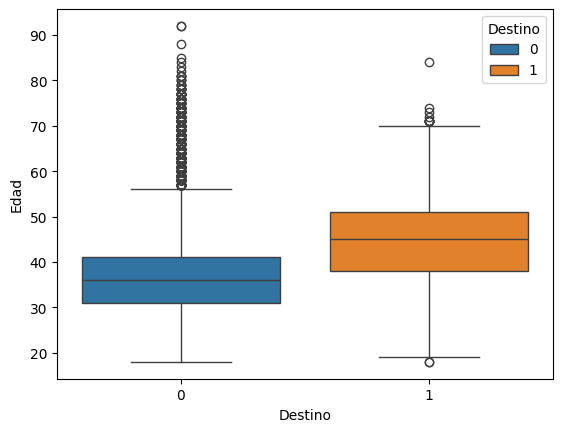

In [11]:
#Destino: Si el cliente salió del banco (1 para Sí, 0 para No)
sns.boxplot(data=df, x='Destino', y='Edad', hue='Destino')
plt.show()

La mediana de edad es más alta entre quienes abandonan. Esto desafía mi hipótesis: los clientes más jóvenes no parecen ser quienes más abandonan.

El grupo que permanece tiene más dispersión de edad y outliers longevos, lo que podría indicar mayor fidelidad en clientes mayores.

El outlier juvenil en Destino = 1 confirma que hay casos jóvenes, pero no suficientes como para mover la mediana.

Puede que la rotación no esté en los "jóvenes", se podría analizar por rangos, haciendo hincapié entre los 30 y 60 años.

................................................................................................................................................................

HIPÓTESIS 2: No existen diferencias significativas en la tasa de abandono entre géneros.

*Elegimos barras porque son la mejor forma de mostrar proporciones comparativas entre categorías, en este caso queremos saber cómo varía el abandono según el género.*

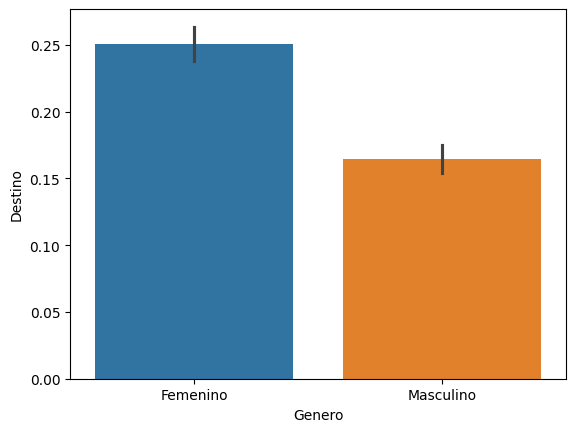

In [12]:
sns.barplot(data=df, x='Genero', y='Destino', hue='Genero', estimator=lambda x:sum(x)/len(x))
plt.show()

Las barras están bastante parejas en altura, lo que visualmente sugiere que la tasa de abandono es similar para cada género.

................................................................................................................................................................

HIPÓTESIS 3: Los clientes que residen en España presentan una mayor tasa de abandono en comparación con los de Francia y Alemania, posiblemente debido a diferencias en la competencia bancaria o características socioeconómicas propias del país

*Elegimos barras por el mismo motivo que la hipótesis anterior, porque necesitamos generar categorías con los países*

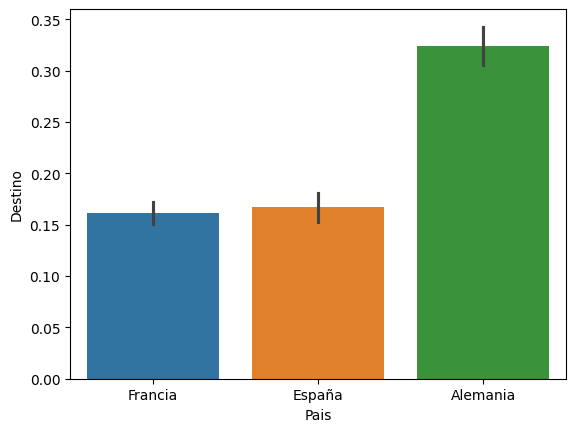

In [13]:
sns.barplot(x='Pais', y='Destino', data=df[df['Pais'].isin(['España', 'Francia', 'Alemania'])], estimator=lambda x:sum(x)/len(x), hue='Pais')
plt.show()

Visualmente, Alemania tiene la tasa más alta de abandono, Francia y España están mucho más abajo.

Esto contradice mi hipótesis. Alemania podría ser el país con mayor tasa de abandono.


---



Vamos a reducir la dimensionalidad mediante PCA

In [57]:
import pandas as pd

url='https://raw.githubusercontent.com/YaniManetti/ProyectoDS_ParteI_Manetti/main/Desercion_Clientes_Banco.csv'
df=pd.read_csv(url, encoding='latin1')

df.head()

,ID,ID_Cliente,Apellido,Puntuacion_Credito,Pais,Genero,Edad,Tenencia,Saldo,NumProductos,TieneTarjeta,EsMiembroActivo,SalarioEstimado,Destino
0,1,15634602,Hargrave,619,Francia,Femenino,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,España,Femenino,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Francia,Femenino,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Francia,Femenino,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,España,Femenino,43,2,125510.82,1,1,1,79084.10,0


In [58]:
# Elimino columnas irrelevantes

df=df.drop(['ID_Cliente','Apellido'],axis=1)

In [59]:
# Mi Dataset tiene columnas categóricas, no numéricas. Con lo cual, lo voy a transformar en variables binarias

df=pd.get_dummies(df,drop_first=True)


In [60]:
# Voy a usar StandardScaler para que todas las variables tengan media 0 y desviación estándar 1. Excluyo "Destino" porque es mi variable objetivo (si el cliente se fue o no).

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(df.drop('Destino',axis=1))

y=df['Destino']

In [50]:
# Aplico PCA

from sklearn.decomposition import PCA

# PCA conservando el 95% de la varianza
pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(X_scaled)

# Mostrar cuántos componentes se conservaron
print(f"Componentes principales seleccionados: {pca.n_components_}")


Componentes principales seleccionados: 11


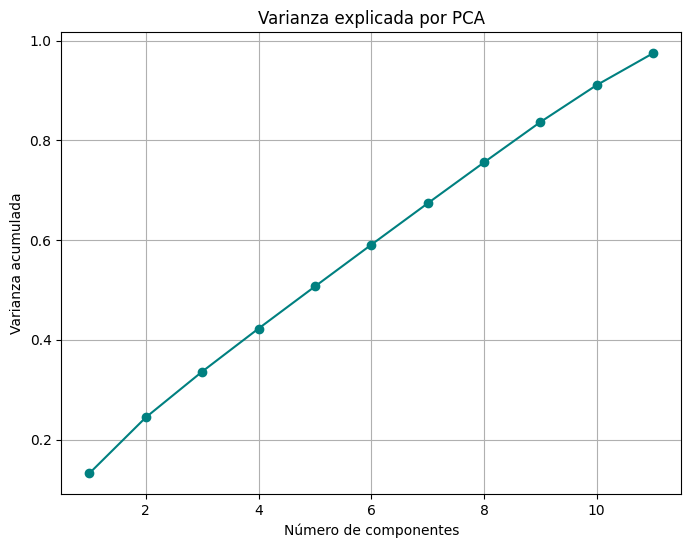

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum(),marker='o',color='teal')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada por PCA')
plt.grid(True)
plt.show()


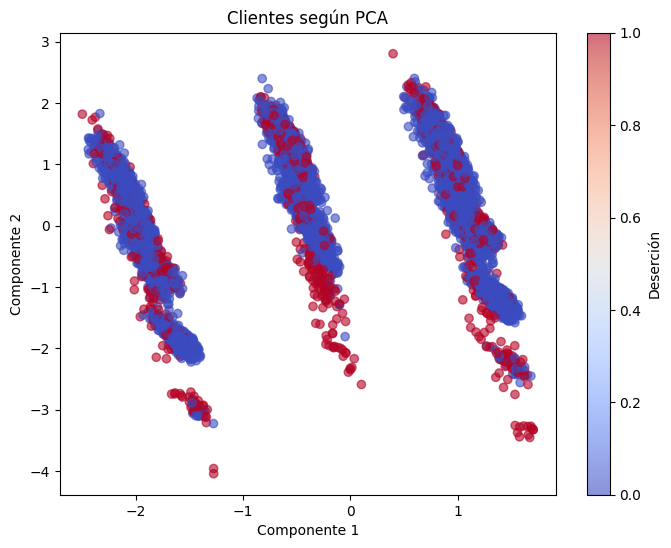

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='coolwarm',alpha=0.6)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Clientes según PCA')
plt.colorbar(label='Deserción')
plt.show()

In [62]:
# Como encontré solapamientos con PCA, voy a usar K-Means
import pandas as pd

url='https://raw.githubusercontent.com/YaniManetti/ProyectoDS_ParteI_Manetti/main/Desercion_Clientes_Banco.csv'
df=pd.read_csv(url, encoding='latin1')
df.head()

df=df.drop(['ID_Cliente','Apellido'], axis=1)
df=pd.get_dummies(df,drop_first=True)

from sklearn.preprocessing import StandardScaler

X=df.drop(['Destino'],axis=1)

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

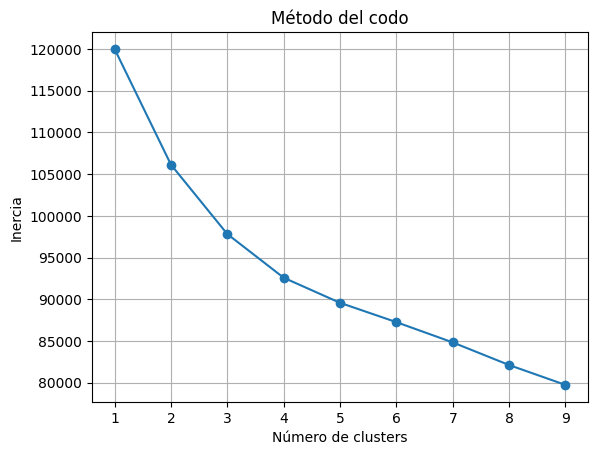

In [69]:
# Uso método ELBOW

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia=[]
K=range(1, 10)

for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K,inertia,marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.grid(True)
plt.show()

In [73]:
# Aplico K-Means

from sklearn.cluster import KMeans

# Elegí 3 clusters como ejemplo
kmeans=KMeans(n_clusters=3,random_state=42)
clusters=kmeans.fit_predict(X_scaled)

# Agrego los clusters al DataFrame original
df['Cluster']=clusters
df.head()

,ID,Puntuacion_Credito,Edad,Tenencia,Saldo,NumProductos,TieneTarjeta,EsMiembroActivo,SalarioEstimado,Destino,Pais_España,Pais_Francia,Genero_Masculino,Cluster
0,1,619,42,2,0.00,1,1,1,101348.88,1,False,True,False,2
1,2,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,False,True,False,1
3,4,699,39,1,0.00,2,0,0,93826.63,0,False,True,False,2
4,5,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,0


In [77]:
# Quiero ver un resumen por grupo

df.groupby('Cluster').mean()

,ID,Puntuacion_Credito,Edad,Tenencia,Saldo,NumProductos,TieneTarjeta,EsMiembroActivo,SalarioEstimado,Destino,Pais_España,Pais_Francia,Genero_Masculino
Cluster,,,,,,,,,,,,,
0,4950.667743,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734,1.0,0.000000,0.560355
1,4986.265169,651.585135,39.152425,4.974176,122313.088467,1.348940,0.706278,0.500105,100681.278409,0.244804,0.0,0.478480,0.545664
2,5069.788043,647.983333,38.551449,5.061957,10564.529167,1.834783,0.713768,0.527899,99653.323264,0.165942,0.0,0.990942,0.532609


In [85]:
# COmo ya hice PCA antes, me parece bien poder graficar los clusters en ese espacio para ver si están bien separados

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_components=pca.fit_transform(X_scaled)

# Creo columnas PCA1 y PCA2 en el DataFrame original
df['PCA1']=pca_components[:,0]
df['PCA2']=pca_components[:,1]

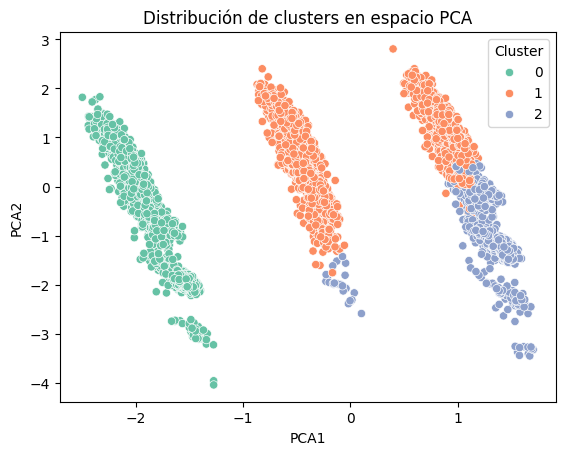

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df,x='PCA1',y='PCA2',hue='Cluster',palette='Set2')
plt.title('Distribución de clusters en espacio PCA')
plt.show()

Los clusters no están completamente solapados, lo que indica que el modelo logró detectar patrones en los datos.



---



In [87]:
# Como mi objetivo es predecir si un cliente se va o no del banco, voy a elegir un algoritmo de clasificación, utilizando el árbol de decisión.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X=df.drop("Destino",axis=1)
y=df["Destino"]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

modelo=DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X_train, y_train)

y_pred=modelo.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8496666666666667
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2416
           1       0.69      0.42      0.52       584

    accuracy                           0.85      3000
   macro avg       0.78      0.69      0.72      3000
weighted avg       0.84      0.85      0.84      3000

[[2303  113]
 [ 338  246]]


Precision: de los que el modelo dijo que eran clase 1, cuántos lo eran realmente?

Recall: de los que realmente eran clase 1, cuántos detectó?

F1-score: equilibrio entre precisión y recall

Support: cantidad de casos reales de cada clase

*   2303 (TN): acertó que eran clase 0
*   246 (TP): acertó que eran clase 1
*   113 (FP): dijo que eran clase 1, pero no lo eran
*   338 (FN): dijo que eran clase 0, pero eran clase 1

***El modelo detecta muy bien los clientes que se quedan, pero le cuesta detectar los que se van***

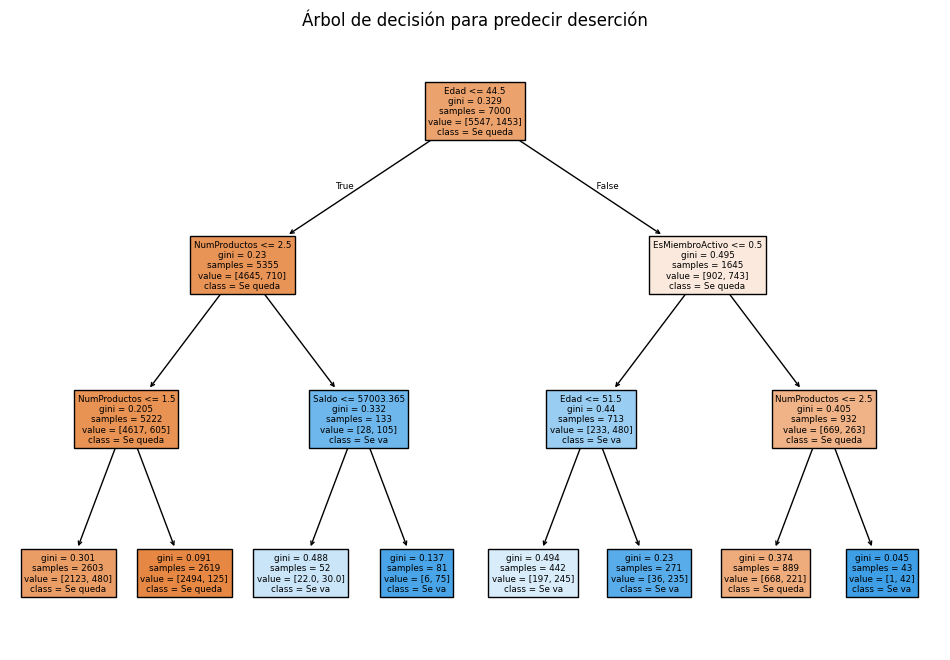

In [88]:
plt.figure(figsize=(12,8))
plot_tree(modelo, feature_names=X.columns,class_names=["Se queda","Se va"],filled=True)
plt.title("Árbol de decisión para predecir deserción")
plt.show()

Variables clave: Edad, número de productos, saldo, activo/no activo

Segmentos de riesgo: clientes mayores, (aún mas de 51), con varios productos, que no son activos

Segmentos estables: clientes jóvenes, con pocos productos y saldo bajo.



---



El árbol de decisión revela que la edad es el principal factor asociado a la deserción. Los clientes menores de 44 años tienden a permanecer, especialmente si tienen pocos productos y bajo saldo. En cambio, los clientes mayores, con más de 2 productos y baja actividad, presentan mayor riesgo de abandono. Esta segmentación permite diseñar estrategias de retención según el perfil del cliente